In [39]:
import numpy as np
import os
import sys
import sklearn.metrics
from pandas import DataFrame
import random
import math

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [40]:
# Load and plot dataset 1,2 and 3

dataset1 = np.loadtxt("dataset1.txt",
                    dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)},
                    delimiter="\t")
dataset2 = np.loadtxt("dataset2.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")
dataset3 = np.loadtxt("dataset3.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")

=================== data 1 ======================


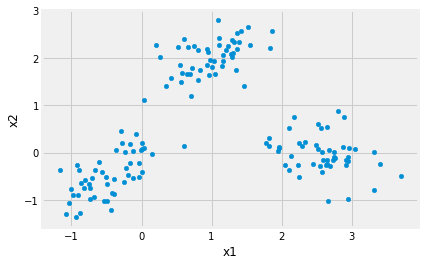

===================== data 2 ===================


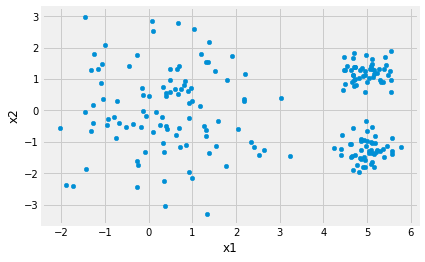

================= data 3 ==================


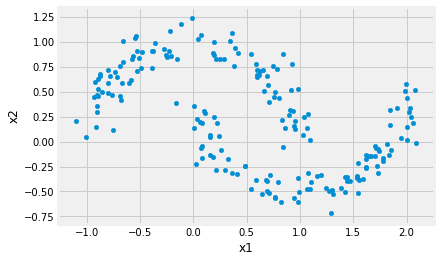

In [41]:
def create_io_matrix(d): 
    """
    formats the input data in a matrix format (n × d) where d is the number of dimentions and n is the number of data points 
    formats the label data in a matrix format (n × 1) where n is the number of data points 
    """
    matrix_input = [[x1, x2] for x1, x2, l in d]
    matrix_labels = [l for x1, x2, l in d]
    
    return (np.array(matrix_input), np.array(matrix_labels))

dataset1_matrix, data1_labels = create_io_matrix(dataset1)
dataset2_matrix, data2_labels = create_io_matrix(dataset2)
dataset3_matrix, data3_labels = create_io_matrix(dataset3)
############# initial data visualization 

df_1 = DataFrame(dataset1_matrix, columns = ['x1', 'x2'])
df_1.plot(kind='scatter', x = 'x1', y = 'x2')

print("=================== data 1 ======================")
plt.show()

df_2 = DataFrame(dataset2_matrix, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')

print("===================== data 2 ===================")
plt.show()

df_3 = DataFrame(dataset3_matrix, columns = ['x1', 'x2'])
df_3.plot(kind='scatter', x = 'x1', y = 'x2')

print("================= data 3 ==================")
plt.show()

In [4]:
# 4.
# Implement the DBSCAN Algorithm

def regionExplorer(p, eps, data):
    neighborhood = []
    for element in range(0, len(data)):
        if np.linalg.norm(data[p] - data[element]) <= eps:            
            neighborhood.append(element)
    return neighborhood

In [5]:
def developCluster(labels, data, p, neighborPts, C, eps, MinPts):
    labels[p] = C
    x = 0
    while x < len(neighborPts):
        xPts = neighborPts[x]
        if labels[xPts] == -1:
             labels[xPts] = C
        elif labels[xPts] == 0:
            labels[xPts] = C
            pxNpts = regionExplorer(xPts, eps, data)
            if len(pxNpts) >= MinPts:
                neighborPts = neighborPts + pxNpts

        x += 1

In [6]:
def DBSCAN(eps, MinPts, data):
    labels = [0]*len(data)
    C = 0
    for i in range(0, len(data)):
        if not (labels[i] == 0):
            continue

        neighborPts = regionExplorer(i, eps, data)
        if len(neighborPts) < MinPts:
            labels[i] = -1
        else:        
            C += 1
            developCluster(labels, data, i, neighborPts, C, eps, MinPts)
    return labels

In [7]:
# Run DBSCAN on the three datasets with different Eps and MinPts values

labels_11 = DBSCAN(0.2, 2, dataset1_matrix)
labels_12 = DBSCAN(0.2, 3, dataset1_matrix)
labels_13 = DBSCAN(0.2, 4, dataset1_matrix)
labels_14 = DBSCAN(0.3, 2, dataset1_matrix)
labels_15 = DBSCAN(0.3, 3, dataset1_matrix)
labels_16 = DBSCAN(0.3, 4, dataset1_matrix)
labels_17 = DBSCAN(0.4, 2, dataset1_matrix)
labels_18 = DBSCAN(0.4, 3, dataset1_matrix)
labels_19 = DBSCAN(0.4, 4, dataset1_matrix)

In [8]:
labels_21 = DBSCAN(0.8, 6, dataset2_matrix)
labels_22 = DBSCAN(0.8, 7, dataset2_matrix)
labels_23 = DBSCAN(0.8, 8, dataset2_matrix)
labels_24 = DBSCAN(0.85, 6, dataset2_matrix)
labels_25 = DBSCAN(0.85, 7, dataset2_matrix)
labels_26 = DBSCAN(0.85, 8, dataset2_matrix)
labels_27 = DBSCAN(0.9, 6, dataset2_matrix)
labels_28 = DBSCAN(0.9, 7, dataset2_matrix)
labels_29 = DBSCAN(0.9, 8, dataset2_matrix)

In [9]:
labels_31 = DBSCAN(0.2, 5, dataset3_matrix)
labels_32 = DBSCAN(0.2, 6, dataset3_matrix)
labels_33 = DBSCAN(0.2, 7, dataset3_matrix)
labels_34 = DBSCAN(0.3, 5, dataset3_matrix)
labels_35 = DBSCAN(0.3, 6, dataset3_matrix)
labels_36 = DBSCAN(0.3, 7, dataset3_matrix)
labels_37 = DBSCAN(0.4, 5, dataset3_matrix)
labels_38 = DBSCAN(0.4, 6, dataset3_matrix)
labels_39 = DBSCAN(0.4, 7, dataset3_matrix)

In [10]:
# One example of the output

labels_23

[1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [15]:
# Print NMI values for dataset 1

import sklearn.metrics 

print("NMI values for dataset 1")
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_11))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_12))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_13))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_14))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_15))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_16))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_17))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_18))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, labels_19))

NMI values for dataset 1
0.6461955461761227
0.6392885391115739
0.60652260711602
0.8080417930347983
0.8126849716192434
0.8148976299994065
0.9260356077055054
0.9261718488229894
0.9181482192813213


In [18]:
# Print CH index values for dataset 1

print("CH index values for dataset 1")
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_11))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_12))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_13))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_14))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_15))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_16))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_17))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_18))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, labels_19))

CH index values for dataset 1
56.398910939924065
57.48518582597868
43.83619696083243
121.57471292634487
175.98696832415988
222.53780202613024
286.63373913947174
351.5905596393003
344.05803577542537


In [21]:
# Print SC values for dataset 1

print("SC values for dataset 1")
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_11, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_12, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_13, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_14, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_15, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_16, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_17, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_18, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, labels_19, metric='euclidean'))

SC values for dataset 1
0.2786845502592716
0.2829631479111223
0.2088572325608173
0.3691677576158477
0.4545787570686583
0.5486328024446382
0.57110032464688
0.648441502288987
0.6481467235878744


In [22]:
# Print NMI values for dataset 2

print("NMI values for dataset 2")
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_21))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_22))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_23))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_24))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_25))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_26))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_27))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_28))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, labels_29))

NMI values for dataset 2
0.9258312153470892
0.9028844466452192
0.8911052469819709
0.9343387492792753
0.9056414732047778
0.9002713402840475
0.9440793471349356
0.9390355529089633
0.9299481895510919


In [23]:
# Print CH index values for dataset 2

print("CH index values for dataset 2")
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_21))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_22))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_23))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_24))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_25))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_26))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_27))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_28))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, labels_29))

CH index values for dataset 2
236.81494136874153
240.1634383902176
237.49142914403797
238.7505994905787
243.49814121485795
238.73459008906775
243.55510713407017
243.12885940091334
238.5045803777127


In [24]:
# Print SC values for dataset 2

print("SC values for dataset 2")
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_21, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_22, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_23, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_24, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_25, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_26, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_27, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_28, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, labels_29, metric='euclidean'))

SC values for dataset 2
0.5230333371141395
0.5169984765894557
0.504434825091014
0.5273101139026393
0.5190337031348906
0.5130221829959507
0.5314396844337226
0.5271479876408587
0.5286313738261954


In [25]:
# Print NMI values for dataset 3

print("NMI values for dataset 3")
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_31))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_32))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_33))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_34))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_35))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_36))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_37))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_38))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, labels_39))

NMI values for dataset 3
0.8071162686890285
0.782367606138723
0.782367606138723
1.0
1.0
1.0
8.881784197001252e-06
8.881784197001252e-06
8.881784197001252e-06


In [32]:
# Print CH index values for dataset 3

print("CH index values for dataset 3")
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_31))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_32))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_33))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_34))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_35))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_36))
#print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_37))
#print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_38))
#print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, labels_39))

# Errors are thrown for the last three lines

CH index values for dataset 3
123.94651505905101
117.36859174096692
117.36859174096692
162.81320806937623
162.81320806937623
162.81320806937623


In [35]:
# Print SC values for dataset 3

print("SC values for dataset 3")
print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_31, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_32, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_33, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_34, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_35, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_36, metric='euclidean'))
#print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_37, metric='euclidean'))
#print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_38, metric='euclidean'))
#print(sklearn.metrics.silhouette_score(dataset3_matrix, labels_39, metric='euclidean'))

# Errors are thrown for the last three lines

SC values for dataset 3
0.2553651453038935
0.32069407479707807
0.32069407479707807
0.36229854178580495
0.36229854178580495
0.36229854178580495


In [132]:
def plotCluster(data, labels, trueLabels):
    colors = ['r', 'y', 'g', 'b', 'c', 'm']
    markers = ['^', 'o', 's', 'p', 'h', 'd']
    for i in range(0, len(labels)):
        l = labels[i]
        ltrue = trueLabels[i]
        x = []
        y = []
        noisex = []
        noisey = []
        if l == -1:
            noisex.append(data[i][0])
            noisey.append(data[i][1])
        else:
            x.append(data[i][0])
            y.append(data[i][1])
        
        plt.scatter(noisex, noisey, marker=markers[ltrue % len(markers)], color='k')
        plt.scatter(x, y, marker=markers[ltrue % len(markers)], color=colors[l % len(colors)])
    
    #plt.legend(loc='upper right')
    plt.show()

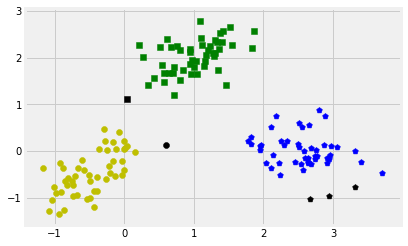

In [39]:
# Based on the NMI values, the best result for dataset 1 is that when Eps = 0.4 and MinPts = 3
# In the scatter plot, circle shape means true label 1, square shape means true label 2, pentagon shape means true label 3
# Different colors represent the learned cluster assignments, and noise points are given color black

plotCluster(dataset1_matrix, labels_18, data1_labels)

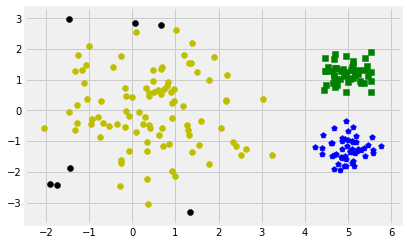

In [40]:
# Based on the NMI values, the best result for dataset 2 is that when Eps = 0.9 and MinPts = 6
# In the scatter plot, circle shape means true label 1, square shape means true label 2, pentagon shape means true label 3
# Different colors represent the learned cluster assignments, and noise points are given color black

plotCluster(dataset2_matrix, labels_27, data2_labels)

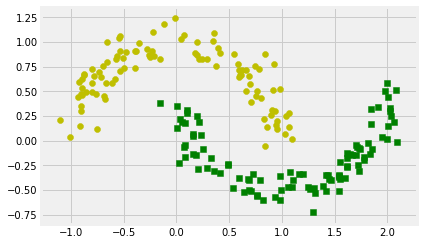

In [44]:
# Based on the NMI values, the best results for dataset 3 are that when Eps = 0.3 and MinPts = 5 or 6 or 7;
# All the three scatter plots are the same, here I choose Eps = 0.3 and Minpts = 6 to plot
# In the scatter plot, circle shape means true label 1, square shape means true label 2 
# Different colors represent the learned cluster assignments, and noise points are given color black (no noise point in this case)

plotCluster(dataset3_matrix, labels_35, data3_labels)

In [62]:
# 5.
# Implement the K-means Algorithm

def Eucdist(p1,p2):
    dist = 0
    for i in range(0,len(p1)):
        dist += (p1[i] - p2[i])**2
    return math.sqrt(dist)

In [63]:
def K_means(data, k):
    d = len(data[0]) 
    Max_Iter = 1000
    i = 0
    pred_cluster = [0] * len(data)
    old_cluster = [-1] * len(data)
    
    cluster_centers = []
    for i in range(k):
        new_cluster = []
        cluster_centers += [random.choice(data)]        
        need_recalculation = False
    
    while (pred_cluster != old_cluster) or (i > Max_Iter) or (need_recalculation) :
        old_cluster = list(pred_cluster)
        need_recalculation = False
        i += 1   
        for x in range(0,len(data)):
            min_dist = float("inf")            
            for c in range(0,len(cluster_centers)):              
                dist = Eucdist(data[x],cluster_centers[c])             
                if (dist < min_dist):
                    min_dist = dist  
                    pred_cluster[x] = c   
        
        for n in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(data)):
                if (pred_cluster[p] == n): 
                    for j in range(0,d):
                        new_center[j] += data[p][j]
                    members += 1
            
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 
                else: 
                    new_center = random.choice(data)
                    need_recalculation = True
                    print ("Forced Recalculation.")
            cluster_centers[n] = new_center
  
    return pred_cluster, cluster_centers

In [94]:
# Run the Kmeans on the three datasets with different K values

Labels_11, Centers_11 = K_means(dataset1_matrix, 1)
Labels_12, Centers_12 = K_means(dataset1_matrix, 2)
Labels_13, Centers_13 = K_means(dataset1_matrix, 3)
Labels_14, Centers_14 = K_means(dataset1_matrix, 4)
Labels_15, Centers_15 = K_means(dataset1_matrix, 5)

In [119]:
Labels_21, Centers_21 = K_means(dataset2_matrix, 1)
Labels_22, Centers_22 = K_means(dataset2_matrix, 2)
Labels_23, Centers_23 = K_means(dataset2_matrix, 3)
Labels_24, Centers_24 = K_means(dataset2_matrix, 4)
Labels_25, Centers_25 = K_means(dataset2_matrix, 5)

In [104]:
Labels_31, Centers_31 = K_means(dataset3_matrix, 1)
Labels_32, Centers_32 = K_means(dataset3_matrix, 2)
Labels_33, Centers_33 = K_means(dataset3_matrix, 3)
Labels_34, Centers_34 = K_means(dataset3_matrix, 4)
Labels_35, Centers_35 = K_means(dataset3_matrix, 5)

In [97]:
# Function to compute SSE

def SSE(data, pred_label, cluster_center):
    sse_j = []
    for i in range(len(cluster_center)):
        sse = 0
        for j in range(len(data)):
            k = pred_label[j]
            if k == i:
                dist = Eucdist(data[j],cluster_center[i])**2
                sse += dist
        sse_j.append(sse)
    
    return sum(sse_j)

In [108]:
# Print SSE for dataset 1 with different K values

print("SSE values for dataset 1")
print(SSE(dataset1_matrix, Labels_11, Centers_11))
print(SSE(dataset1_matrix, Labels_12, Centers_12))
print(SSE(dataset1_matrix, Labels_13, Centers_13))
print(SSE(dataset1_matrix, Labels_14, Centers_14))
print(SSE(dataset1_matrix, Labels_15, Centers_15))

SSE values for dataset 1
455.0914984640697
215.9434994613566
49.69882262882386
42.64517717157098
35.488972531345084


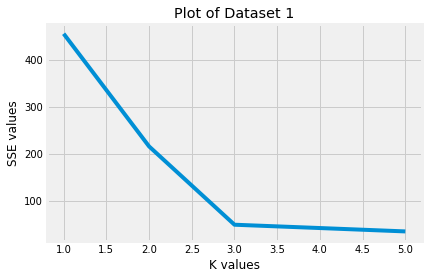

In [124]:
# Plot SSE for dataset 1

X = [1, 2, 3, 4, 5]
Y = [SSE(dataset1_matrix, Labels_11, Centers_11),
    SSE(dataset1_matrix, Labels_12, Centers_12),
    SSE(dataset1_matrix, Labels_13, Centers_13),
    SSE(dataset1_matrix, Labels_14, Centers_14),
    SSE(dataset1_matrix, Labels_15, Centers_15)]
plt.plot(X, Y)
plt.xlabel('K values')
plt.ylabel('SSE values')
plt.title('Plot of Dataset 1')
plt.show()

# Using the elbow find method, the best result is K = 3

In [100]:
# Print the CH index values for dataset 1

print("CH index values for dataset 1")
#print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, Labels_11))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, Labels_12))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, Labels_13))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, Labels_14))
print(sklearn.metrics.calinski_harabaz_score(dataset1_matrix, Labels_15))

CH index values for dataset 1
163.90353930860203
599.5385825621063
470.6836497707418
428.600505456357


In [106]:
# Print SC values for dataset 1

print("SC values for dataset 1")
#print(sklearn.metrics.silhouette_score(dataset1_matrix, Labels_11, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, Labels_12, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, Labels_13, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, Labels_14, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset1_matrix, Labels_15, metric='euclidean'))

SC values for dataset 1
0.5330828787520077
0.7222054254371456
0.5954972805912017
0.4849312197159414


In [107]:
# Print NMI values for dataset 1

print("NMI values for dataset 1")
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, Labels_11))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, Labels_12))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, Labels_13))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, Labels_14))
print(sklearn.metrics.normalized_mutual_info_score(data1_labels, Labels_15))

NMI values for dataset 1
-4.9960036108132044e-06
0.7249271656767677
1.0
0.909797942569246
0.8408024848297275


In [120]:
# Print SSE for dataset 2 with different K values

print("SSE values for dataset 2")
print(SSE(dataset2_matrix, Labels_21, Centers_21))
print(SSE(dataset2_matrix, Labels_22, Centers_22))
print(SSE(dataset2_matrix, Labels_23, Centers_23))
print(SSE(dataset2_matrix, Labels_24, Centers_24))
print(SSE(dataset2_matrix, Labels_25, Centers_25))

SSE values for dataset 2
1534.9378217026212
476.7089216199835
319.77456030203626
204.96433985026823
157.58895214210466


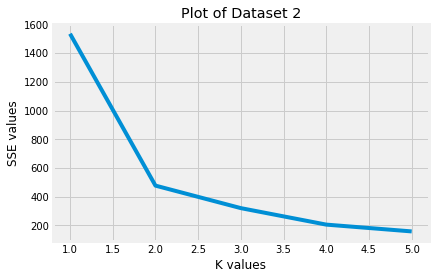

In [123]:
# Plot SSE for dataset 2

X = [1, 2, 3, 4, 5]
Y = [SSE(dataset2_matrix, Labels_21, Centers_21),
    SSE(dataset2_matrix, Labels_22, Centers_22),
    SSE(dataset2_matrix, Labels_23, Centers_23),
    SSE(dataset2_matrix, Labels_24, Centers_24),
    SSE(dataset2_matrix, Labels_25, Centers_25)]
plt.plot(X, Y)
plt.xlabel('K values')
plt.ylabel('SSE values')
plt.title('Plot of Dataset 2')
plt.show()

# Using the elbow find method, the best result is K = 2

In [122]:
# Print the CH index values for dataset 2

print("CH index values for dataset 2")
#print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, Labels_21))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, Labels_22))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, Labels_23))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, Labels_24))
print(sklearn.metrics.calinski_harabaz_score(dataset2_matrix, Labels_25))

CH index values for dataset 2
439.53304147177676
374.3061397220078
423.93521174381016
426.0816286824916


In [125]:
# Print SC values for dataset 2

print("SC values for dataset 2")
#print(sklearn.metrics.silhouette_score(dataset2_matrix, Labels_21, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, Labels_22, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, Labels_23, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, Labels_24, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset2_matrix, Labels_25, metric='euclidean'))

SC values for dataset 2
0.6073427953553688
0.6169908820119862
0.5417589976396975
0.5436351949349932


In [126]:
# Print NMI values for dataset 2

print("NMI values for dataset 2")
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, Labels_21))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, Labels_22))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, Labels_23))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, Labels_24))
print(sklearn.metrics.normalized_mutual_info_score(data2_labels, Labels_25))

NMI values for dataset 2
-2.220446049250313e-06
0.7368455372424676
0.9009130512292998
0.8105489757829996
0.814546953426533


In [127]:
# Print SSE for dataset 3 with different K values

print("SSE values for dataset 3")
print(SSE(dataset3_matrix, Labels_31, Centers_31))
print(SSE(dataset3_matrix, Labels_32, Centers_32))
print(SSE(dataset3_matrix, Labels_33, Centers_33))
print(SSE(dataset3_matrix, Labels_34, Centers_34))
print(SSE(dataset3_matrix, Labels_35, Centers_35))

SSE values for dataset 3
206.84589297663132
76.78755870340447
47.28304841883354
33.36313165514169
27.611462429959367


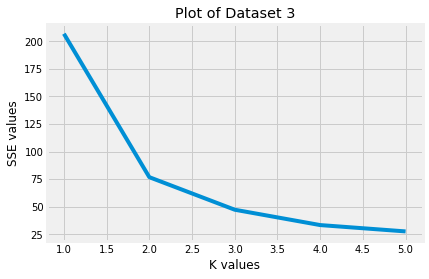

In [128]:
# Plot SSE for dataset 3

X = [1, 2, 3, 4, 5]
Y = [SSE(dataset3_matrix, Labels_31, Centers_31),
    SSE(dataset3_matrix, Labels_32, Centers_32),
    SSE(dataset3_matrix, Labels_33, Centers_33),
    SSE(dataset3_matrix, Labels_34, Centers_34),
    SSE(dataset3_matrix, Labels_35, Centers_35)]
plt.plot(X, Y)
plt.xlabel('K values')
plt.ylabel('SSE values')
plt.title('Plot of Dataset 3')
plt.show()

# Using the elbow find method, the best result is K = 2

In [129]:
# Print the CH index values for dataset 3

print("CH index values for dataset 3")
#print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, Labels_31))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, Labels_32))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, Labels_33))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, Labels_34))
print(sklearn.metrics.calinski_harabaz_score(dataset3_matrix, Labels_35))

CH index values for dataset 3
335.3609702004652
332.401160976812
339.72251736318174
316.45113008101947


In [130]:
# Print SC values for dataset 3

print("SC values for dataset 3")
#print(sklearn.metrics.silhouette_score(dataset3_matrix, Labels_31, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, Labels_32, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, Labels_33, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, Labels_34, metric='euclidean'))
print(sklearn.metrics.silhouette_score(dataset3_matrix, Labels_35, metric='euclidean'))

SC values for dataset 3
0.5066559204455419
0.4644265639271346
0.5088728406325193
0.43948871232327535


In [131]:
# Print NMI values for dataset 3

print("NMI values for dataset 3")
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, Labels_31))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, Labels_32))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, Labels_33))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, Labels_34))
print(sklearn.metrics.normalized_mutual_info_score(data3_labels, Labels_35))

NMI values for dataset 3
8.881784197001252e-06
0.20619596572453136
0.38983475529142503
0.6154567522171212
0.4177620308676389


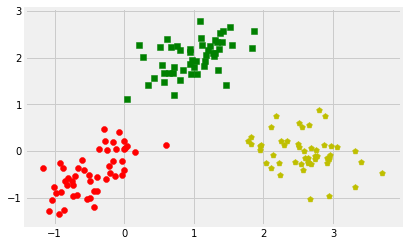

In [137]:
# For convenience of viewing, I only show the best cluster result of each dataset based on their SSE values 
# For dataset 1, we get the best result when K = 3
# In the scatter plot, circle shape means true label 1, square shape means true label 2, pentagon shape means true label 3
# Different colors represent the learned cluster assignments

plotCluster(dataset1_matrix, Labels_13, data1_labels)

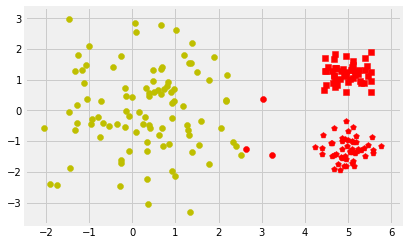

In [139]:
# For dataset 2, we get the best result when K = 2
# In the scatter plot, circle shape means true label 1, square shape means true label 2, pentagon shape means true label 3
# Different colors represent the learned cluster assignments

plotCluster(dataset2_matrix, Labels_22, data2_labels)

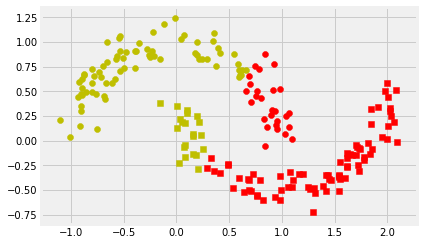

In [140]:
# For dataset 3, we get the best result when K = 2
# In the scatter plot, circle shape means true label 1, square shape means true label 2
# Different colors represent the learned cluster assignments

plotCluster(dataset3_matrix, Labels_32, data3_labels)

In [ ]:
# 6.

# Based on the best scatter plots derived from the above two algorithms:

# Kmeans performs best on dataset 1. Because in the best Kmeans scatter plot of dataset 1, all points are correctly 
# assigned to their true labels while some points are learnt as noise points in the corresponding best DBSCAN scatter plot.

# DBSCAN performs best on dataset 2. Because in the best DBSCAN scatter plot of dataset 2, most of points are correctly
# assigned to their true labels(only few noise points) while there are only two learnt clusters in the
# corresponding best Kmeans scatter plot(since true number of clusters is 3).
# This makes sense because the original data points have different densities.

# DBSCAN performs best on dataset 3. Because in the best DBSCAN scatter plot of dataset 3, all points are correctly 
# assigned to their true labels while lots of points have wrong assignments in the corresponding best Kmeans scatter plot.
# This makes sense because the original data points are in irregular shape.